In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_csv("googleplaystore.csv")

#print(df.dtypes)
#df.loc[df.App=='Tiny Scanner - PDF Scanner App']
# df[df.duplicated(keep='first')]
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

print(len(df))

9659


In [4]:
df[10472:].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [5]:
print('Number of apps in the dataset : ' , len(df))
df.sample(10)

Number of apps in the dataset :  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1517,Lamp detector,LIBRARIES_AND_DEMO,NaN,5,1.8M,"1,000+",Free,0,Everyone,Libraries & Demo,"April 23, 2018",4.4.2,2.3.3 and up
1231,Cookpad,FOOD_AND_DRINK,4.5,131569,8.2M,"10,000,000+",Free,0,Everyone,Food & Drink,"August 3, 2018",2.76.2.0-android,4.2 and up
8547,Fifth Edition DM Tools,FAMILY,4.1,942,3.0M,"100,000+",Free,0,Everyone,Role Playing,"January 19, 2017",1.14b,3.0 and up
3058,"Yahoo Sports - scores, stats, news, & highlights",SPORTS,4.5,32386,19M,"1,000,000+",Free,0,Everyone,Sports,"August 1, 2018",7.8.0,5.1 and up
1843,Angry Birds 2,GAME,4.6,3883589,57M,"100,000,000+",Free,0,Everyone,Casual,"July 26, 2018",2.21.1,4.1 and up
4514,Q-Ticketing,MAPS_AND_NAVIGATION,3.8,114,19M,"10,000+",Free,0,Everyone,Maps & Navigation,"December 18, 2017",1.8.3111,4.3 and up
686,Girls Online Talk - Free Text and Video Chat,DATING,4.7,791,3.7M,"10,000+",Free,0,Mature 17+,Dating,"May 15, 2018",8.2,4.0.3 and up
5660,BringGo AU & NZ,MAPS_AND_NAVIGATION,2.8,440,23M,"10,000+",Paid,$0.99,Everyone,Maps & Navigation,"May 10, 2018",2.5.9,2.3.3 and up
1401,Health and Nutrition Guide,HEALTH_AND_FITNESS,4.3,7895,3.3M,"500,000+",Free,0,Everyone,Health & Fitness,"July 15, 2018",3.3,4.0 and up
2064,Papumba Academy - Fun Learning For Kids,FAMILY,4.4,496,94M,"100,000+",Free,0,Everyone,Education;Education,"July 11, 2018",1.0,4.2 and up


DATA CLEANING

In [6]:
# - Installs : Remove + and ,

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: float(x))
df['Installs'] = df['Installs'][df.Installs!=0].dropna()
#print(type(df['Installs'].values))

In [7]:
# - Size : Remove 'M', Replace 'k' and divide by 10^-3
#df['Size'] = df['Size'].fillna(0)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
#df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df = df.astype({'Reviews': 'int'})

df['Reviews'] = df['Reviews'][df.Reviews!=0].dropna()

#df['Reviews'] = df['Reviews'].apply(lambda x: 'NaN' if int(x) == 0 else int(x))
#print(df.loc[df.Size == 0.713]) #index = 3384
#df.loc[df.col1 == '']['col2']

# 0 - Free, 1 - Paid
#df['Type'] = pd.factorize(df['Type'])[0]
#print(df.dtypes)

In [8]:
df['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 9659, dtype: float64

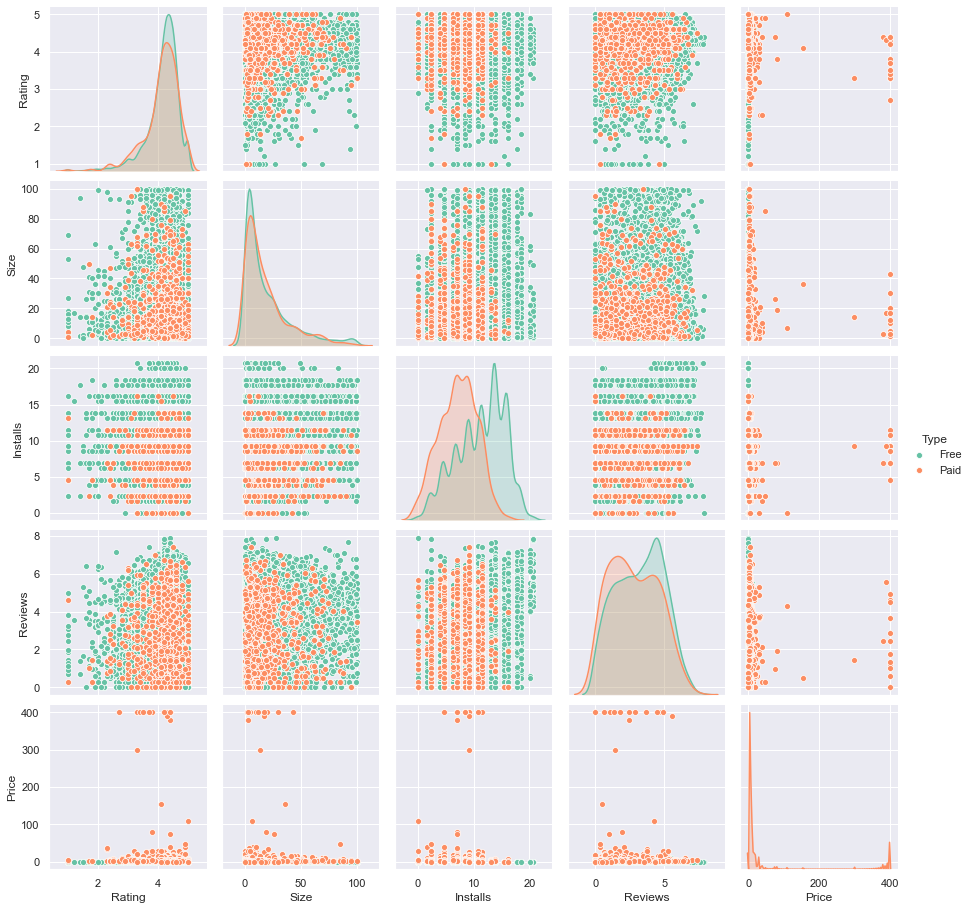

In [9]:
#print(df.dtypes)


x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs']
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

l = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

In [10]:
number_of_apps_in_category = df['Type'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

In [10]:
data = [go.Histogram(
        x = df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df['Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.173243045387998


F_onewayResult(statistic=12.79263715618054, pvalue=2.323280446259348e-20)

The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.



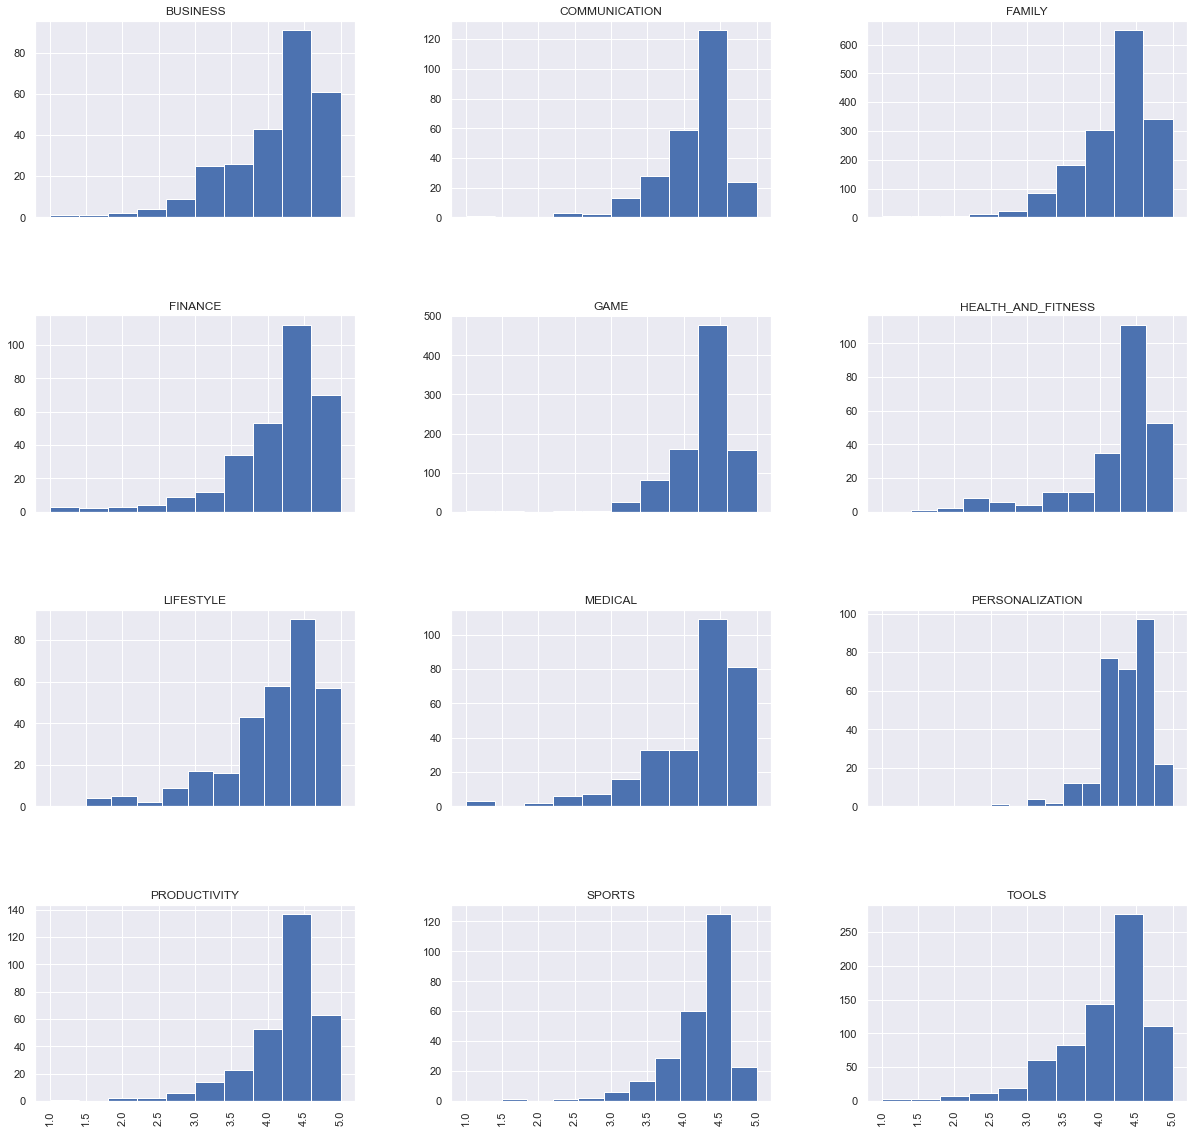

In [11]:
import scipy.stats as stats
f = stats.f_oneway(df.loc[df.Category == 'BUSINESS']['Rating'].dropna(), 
               df.loc[df.Category == 'FAMILY']['Rating'].dropna(),
               df.loc[df.Category == 'GAME']['Rating'].dropna(),
               df.loc[df.Category == 'PERSONALIZATION']['Rating'].dropna(),
               df.loc[df.Category == 'LIFESTYLE']['Rating'].dropna(),
               df.loc[df.Category == 'FINANCE']['Rating'].dropna(),
               df.loc[df.Category == 'EDUCATION']['Rating'].dropna(),
               df.loc[df.Category == 'MEDICAL']['Rating'].dropna(),
               df.loc[df.Category == 'TOOLS']['Rating'].dropna(),
               df.loc[df.Category == 'PRODUCTIVITY']['Rating'].dropna()
              )

print(f)
print('\nThe p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.\n')
#temp = df.loc[df.Category.isin(['BUSINESS', 'DATING'])]

groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

In [12]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
#print(type(groups.item.['BUSINESS']))
print('Average rating = ', np.nanmean(list(groups.Rating)))
#print(len(groups.loc[df.Category == 'DATING']))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]


#df_sorted = df.groupby('Category').agg({'Rating':'median'}).reset_index().sort_values(by='Rating', ascending=False)
#print(df_sorted)

layout = {'title' : 'App ratings across major categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.Rating)),
              'x1': 19,
              'y1': np.nanmean(list(groups.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': df.loc[df.Category==category]['Rating'], 
    'type':'violin',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.Category)))]



plotly.offline.iplot({'data': data, 'layout': layout})

Average rating =  4.170026786973072


In [13]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

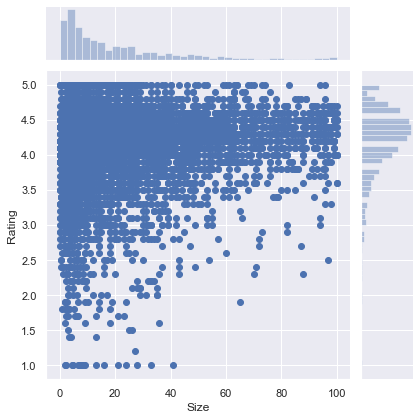

In [14]:
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(8, 8)
sns.set_style("darkgrid")
ax = sns.jointplot(df['Size'], df['Rating'])
#ax.set_title('Rating Vs Size')

In [15]:

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(list(set(groups.Category))))]

subset_df = df[df.Size > 40]
groups_temp = subset_df.groupby('Category').filter(lambda x: len(x) >20)

# for category in enumerate(list(set(groups_temp.Category))):
#     print (category)

data = [{
    'x': groups_temp.loc[subset_df.Category==category[1]]['Rating'], 
    'type':'scatter',
    'y' : subset_df['Size'],
    'name' : str(category[1]),
    'mode' : 'markers',
    'showlegend': True,
    #'marker': {'color':c[i]}
    #'text' : df['rating'],
    } for category in enumerate(['GAME', 'FAMILY'])]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

# heavy_categories = [ 'ENTERTAINMENT', 'MEDICAL', 'DATING']

# data = [{
#     'x': groups.loc[df.Category==category]['Rating'], 
#     'type':'scatter',
#     'y' : df['Size'],
#     'name' : category,
#     'mode' : 'markers',
#     'showlegend': True,
#     #'text' : df['rating'],
#     } for category in heavy_categories]

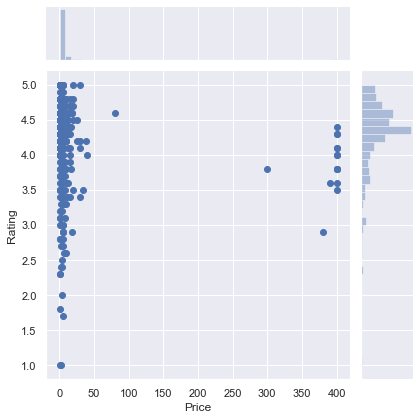

In [16]:
paid_apps = df[df.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

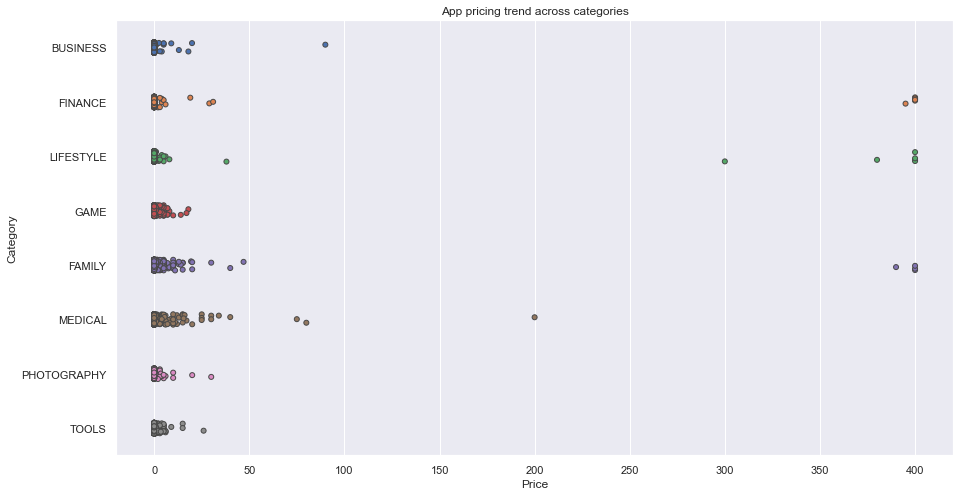

In [17]:
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')

In [18]:
#print('Junk apps priced above 350$')
df[['Category', 'App']][df.Price > 200]

,Category,App
4197,FAMILY,most expensive app (H)
4362,LIFESTYLE,💎 I'm rich
4367,LIFESTYLE,I'm Rich - Trump Edition
5351,LIFESTYLE,I am rich
5354,FAMILY,I am Rich Plus
5355,LIFESTYLE,I am rich VIP
5356,FINANCE,I Am Rich Premium
5357,LIFESTYLE,I am extremely Rich
5358,FINANCE,I am Rich!
5359,FINANCE,I am rich(premium)


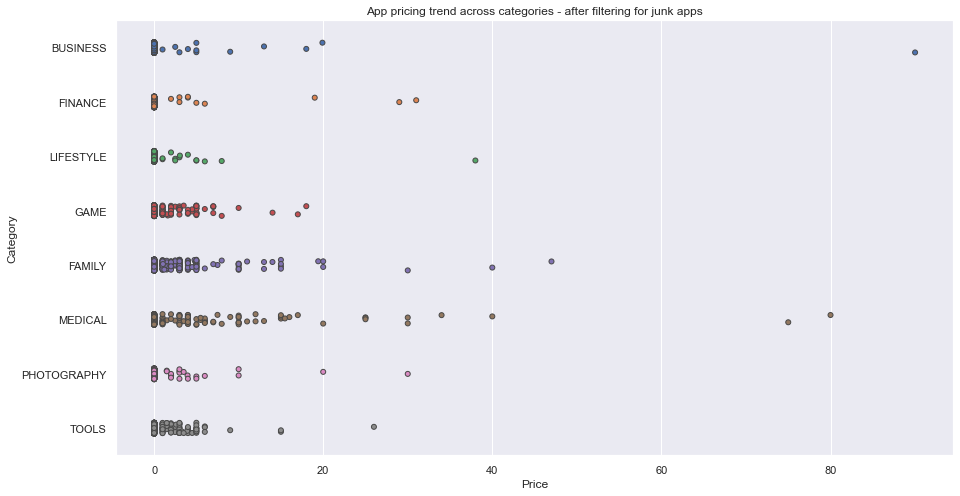

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
subset_df_price = subset_df[subset_df.Price<100]
p = sns.stripplot(x="Price", y="Category", data=subset_df_price, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories - after filtering for junk apps')

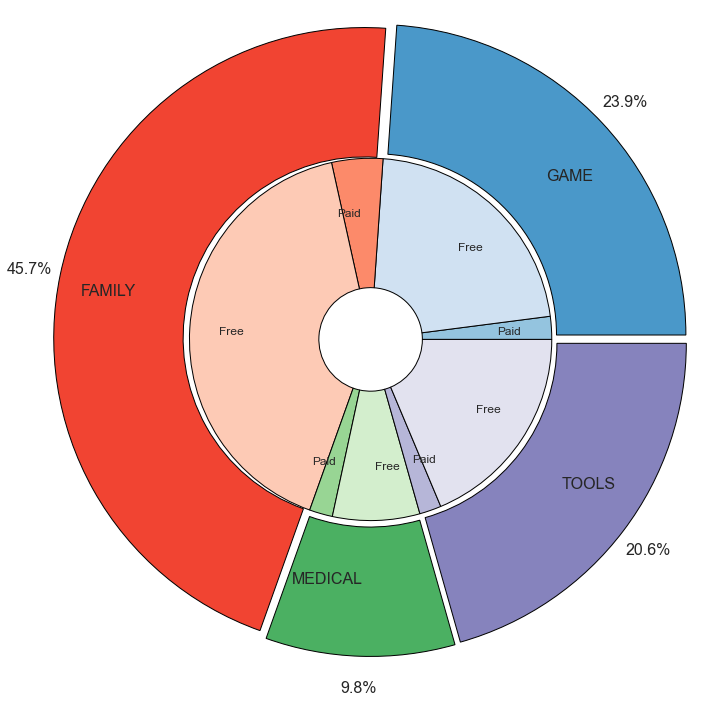

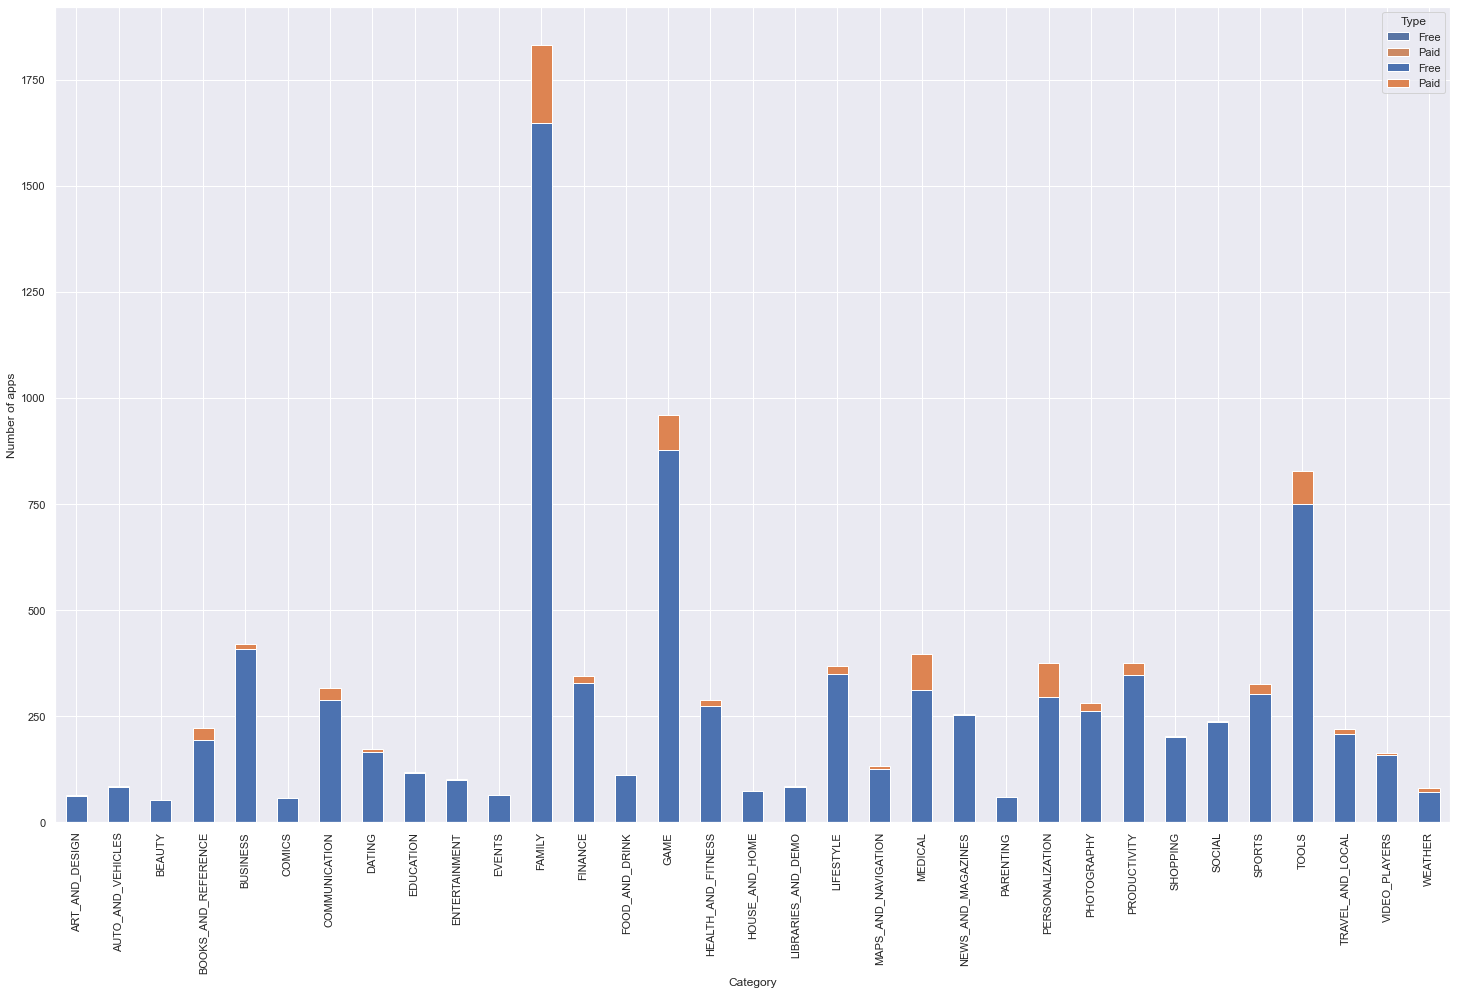

In [20]:
# Stacked bar graph for top 5-10 categories - Ratio of paid and free apps
#fig, ax = plt.subplots(figsize=(15,10))

new_df = df.groupby(['Category', 'Type']).agg({'App' : 'count'}).reset_index()
#print(new_df)

# outer_group_names = df['Category'].sort_values().value_counts()[:5].index
# outer_group_values = df['Category'].sort_values().value_counts()[:5].values

outer_group_names = ['GAME', 'FAMILY', 'MEDICAL', 'TOOLS']
outer_group_values = [len(df.App[df.Category == category]) for category in outer_group_names]

a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]


inner_group_names = ['Paid', 'Free'] * 4
inner_group_values = []
#inner_colors = ['#58a27c','#FFD433']


for category in outer_group_names:
    for t in ['Paid', 'Free']:
        x = new_df[new_df.Category == category]
        try:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(int(x.App[x.Type == t].values[0]))
        except:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(0)

explode = (0.025,0.025,0.025,0.025)
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, texts, _ = ax.pie(outer_group_values, radius=1.2, labels=outer_group_names, autopct='%1.1f%%', pctdistance=1.1,
                                 labeldistance= 0.75,  explode = explode, colors=[a(0.6), b(0.6), c(0.6), d(0.6)], textprops={'fontsize': 16})
plt.setp( mypie, width=0.5, edgecolor='black')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(inner_group_values, radius=1.2-0.5, labels=inner_group_names, labeldistance= 0.7, 
                   textprops={'fontsize': 12}, colors = [a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2), d(0.4), d(0.2)])
plt.setp( mypie2, width=0.5, edgecolor='black')
plt.margins(0,0)
 
# show it
plt.tight_layout()
plt.show()



ax = sns.countplot(x="Category", hue="Type", data=new_df)

df.groupby(['Category', 'Type']).count()['App'].unstack().plot(kind='bar', stacked=True, ax=ax)
ylabel = plt.ylabel('Number of apps')

In [21]:
trace0 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)
trace1 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [22]:
temp_df = df[df.Type == 'Paid']
temp_df = temp_df[temp_df.Size > 5]
#type_groups = df.groupby('Type')

data = [{
    #'x': type_groups.get_group(t)['Rating'], 
    'x' : temp_df['Rating'],
    'type':'scatter',
    'y' : temp_df['Size'],
    #'name' : t,
    'mode' : 'markers',
    #'showlegend': True,
    'text' : df['Size'],
    } for t in set(temp_df.Type)]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

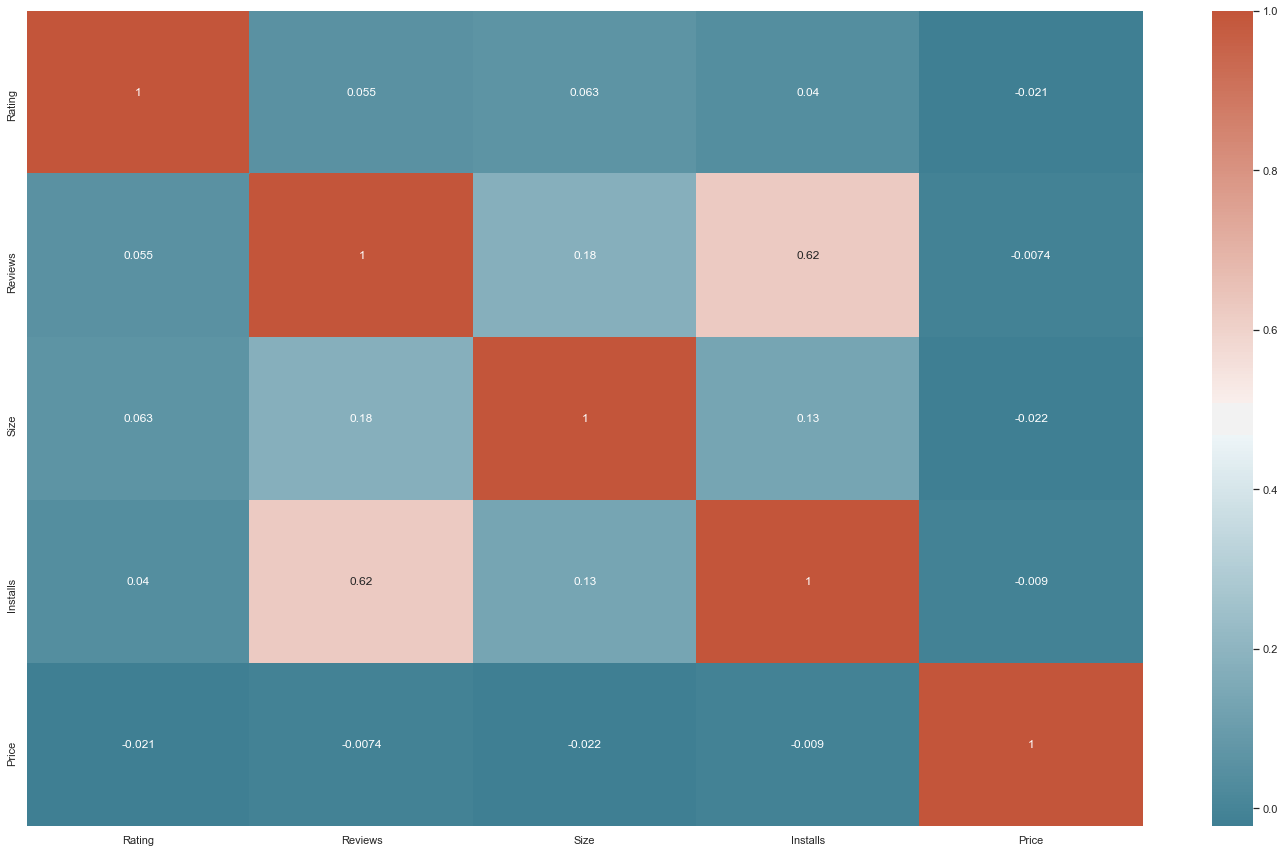

In [23]:
#df['Installs'].corr(df['Reviews'])
#print(np.corrcoef(l, rating))

corrmat = df.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

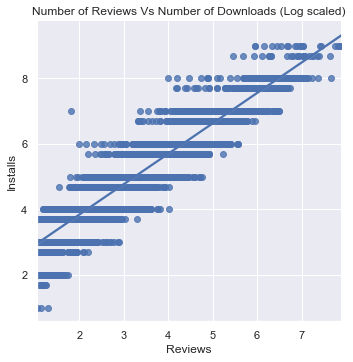

In [24]:
df_copy = df.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df['Installs'])
df_copy['Reviews'] = np.log10(df['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

In [25]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
df['Rating'].iplot(kind='hist', xTitle='Rating', yTitle='Frequency', title='Rating Overview')

AttributeError: 'Series' object has no attribute 'iplot'

In [27]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

NameError: name 'train_test_split' is not defined

In [ ]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', marker = 'x')
plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [4]:
rev = pd.read_csv("revenue.csv", index_col="Date")

In [5]:
rev

,New York,Los Angeles,Miami
Date,,,
1/1/16,985,122,499
1/2/16,738,788,534
1/3/16,14,20,933
1/4/16,730,904,885
1/5/16,114,71,253
1/6/16,936,502,497
1/7/16,123,996,115
1/8/16,935,492,886
1/9/16,846,954,823


In [6]:
rev.sum()

New York       5475
Los Angeles    5134
Miami          5641
dtype: int64